In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# Data cleaning

In [5]:
df.rename(columns={'v1':'target', 'v2':'sms'}, inplace=True)
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [6]:
df.head()

,target,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.duplicated().sum()

403

In [8]:
df.drop_duplicates(keep='first', inplace=True)

In [9]:
df.isna().sum()

target    0
sms       0
dtype: int64

In [10]:
df.loc[df.target=='ham', 'target'] = 0
df.loc[df.target=='spam', 'target'] = 1

In [11]:
df.head()

,target,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.shape

(5169, 2)

In [13]:
df.head()

,target,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# EDA

<Axes: ylabel='count'>

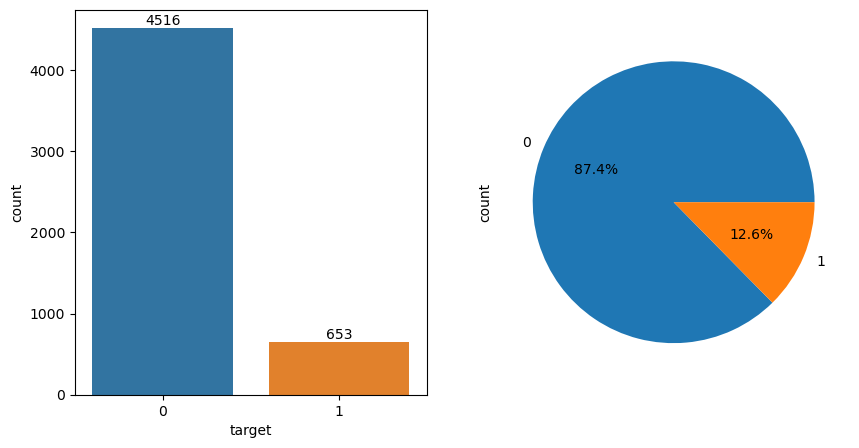

In [14]:
_, ax = plt.subplots(1, 2, figsize=(10, 5))
plot1 = sns.countplot(df, x='target', ax=ax[0])
for container in plot1.containers:
    plot1.bar_label(container)
    
df.target.value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax[1])

In [16]:
"""
Punkt Sentence Tokenizer

This tokenizer divides a text into a list of sentences
by using an unsupervised algorithm to build a model for abbreviation
words, collocations, and words that start sentences
"""
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Student\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Feature Engineering

In [17]:
df['sentences_count'] = df['sms'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [18]:
df['words_count'] = df['sms'].apply(lambda x: len(nltk.word_tokenize(x)))

In [19]:
df['characters_count'] = df['sms'].apply(len)

In [20]:
df.head()

,target,sms,sentences_count,words_count,characters_count
0,0,"Go until jurong point, crazy.. Available only ...",2,24,111
1,0,Ok lar... Joking wif u oni...,2,8,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,2,37,155
3,0,U dun say so early hor... U c already then say...,1,13,49
4,0,"Nah I don't think he goes to usf, he lives aro...",1,15,61


In [21]:
df[df.target==1].describe()

,sentences_count,words_count,characters_count
count,653.000000,653.000000,653.000000
mean,2.970904,27.667688,137.891271
std,1.488425,7.008418,30.137753
min,1.000000,2.000000,13.000000
25%,2.000000,25.000000,132.000000
50%,3.000000,29.000000,149.000000
75%,4.000000,32.000000,157.000000
max,9.000000,46.000000,224.000000


<Axes: xlabel='characters_count', ylabel='Count'>

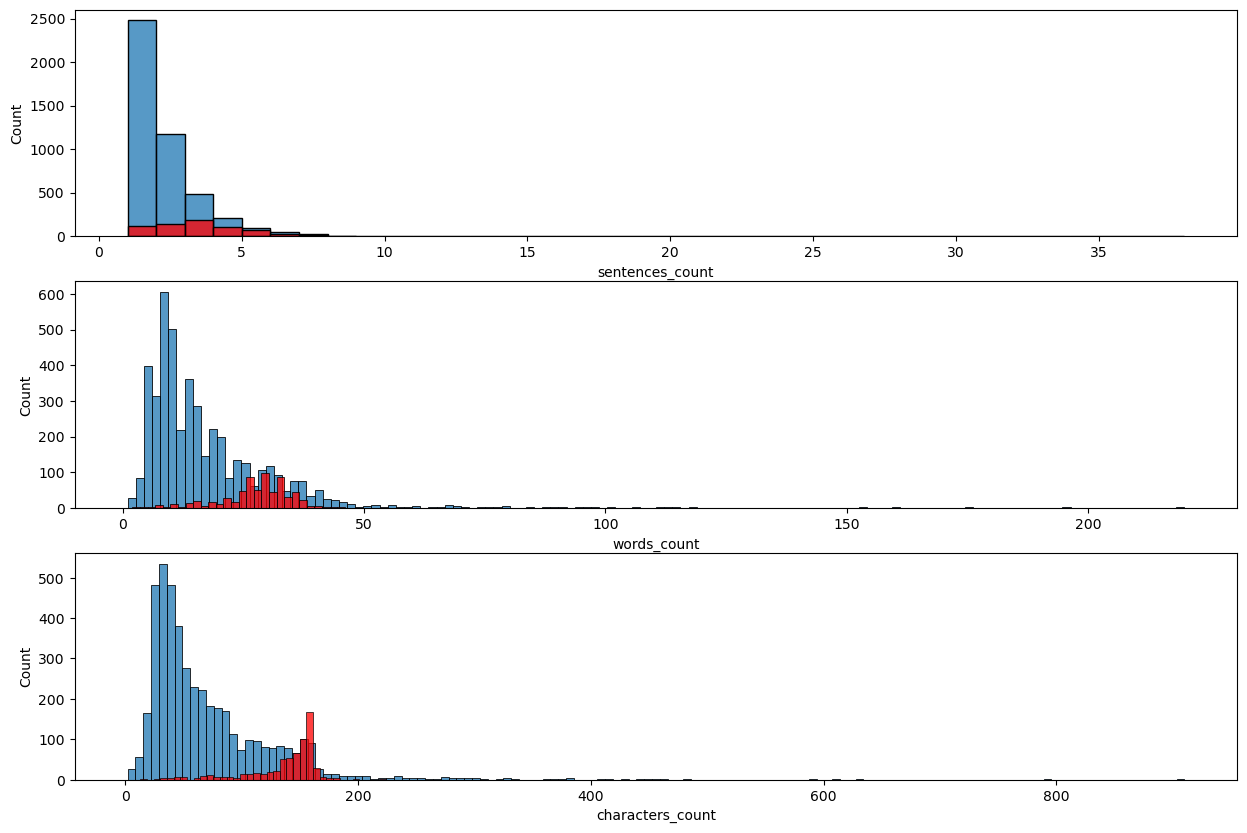

In [22]:
_, ax=plt.subplots(3,1,figsize=(15,10))

sns.histplot(df[df.target==0]['sentences_count'], ax=ax[0], binwidth=1)
sns.histplot(df[df.target==1]['sentences_count'], color='red', ax=ax[0], binwidth=1)

sns.histplot(df[df.target==0]['words_count'], ax=ax[1])
sns.histplot(df[df.target==1]['words_count'], color='red', ax=ax[1])

sns.histplot(df[df.target==0]['characters_count'], ax=ax[2])
sns.histplot(df[df.target==1]['characters_count'], color='red', ax=ax[2])

C:\Users\Student\New folder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


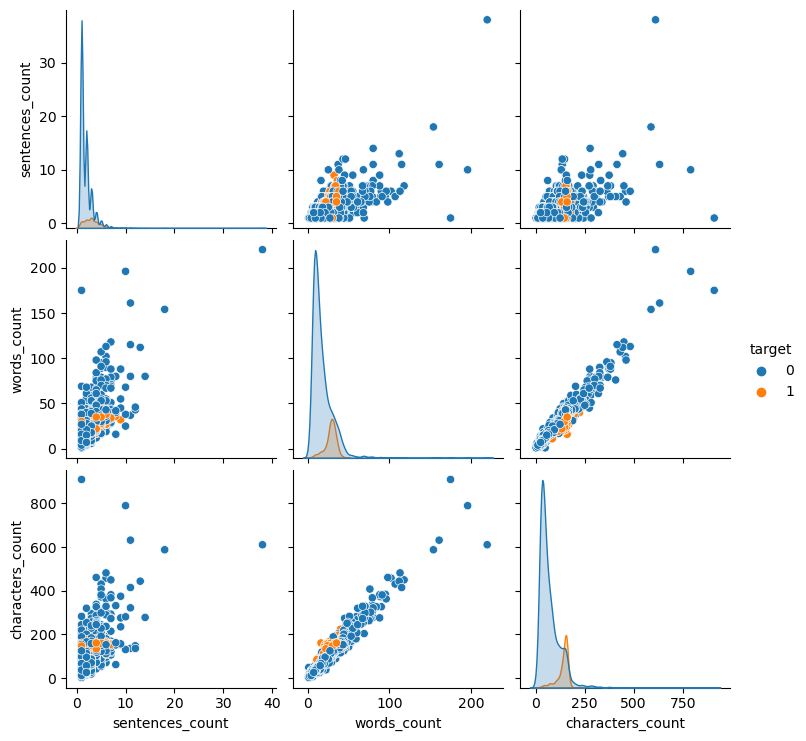

In [23]:
sns.pairplot(df, hue='target')

# Data preprocessing

In [24]:
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [25]:
def preprocess_text(text):
    text = text.lower()
    
    text = nltk.word_tokenize(text)
    
    text = [i for i in text if i.isalnum()]
    
    text = [i for i in text if i not in stopwords.words('english') and i not in string.punctuation]
    
    ps = PorterStemmer()
    text = [ps.stem(i) for i in text]
    
    return " ".join(text)

In [26]:
df['text_transformed'] = df['sms'].apply(preprocess_text)

In [28]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/34/ac/72a4e42e76bf549dfd91791a6b10a9832f046c1d48b5e778be9ec012aa47/wordcloud-1.9.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   -- ------------------------------------- 10.2/151.4 kB ? eta -:--:--
   ------- ------------------------------- 30.7/151.4 kB 435.7 kB/s eta 0:00:01
   ----------------------- --------------- 92.2/151.4 kB 751.6 kB/s eta 0:00:01
   -------------------------------------- 151.4/151.4 kB 905.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [29]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=1000, background_color='white', min_font_size=15)

In [30]:
wc_spam = wc.generate(df[df.target == 1]['text_transformed'].str.cat(sep=' '))

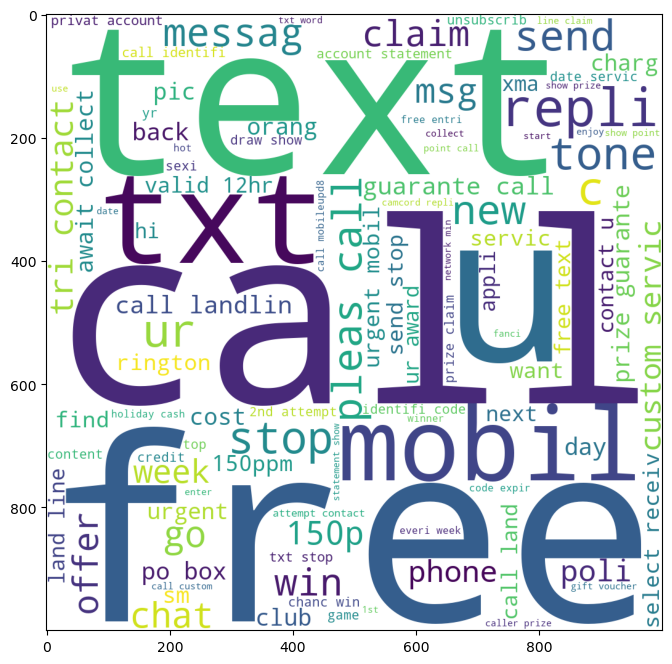

In [31]:
plt.figure(figsize=(8,8))
plt.imshow(wc_spam)

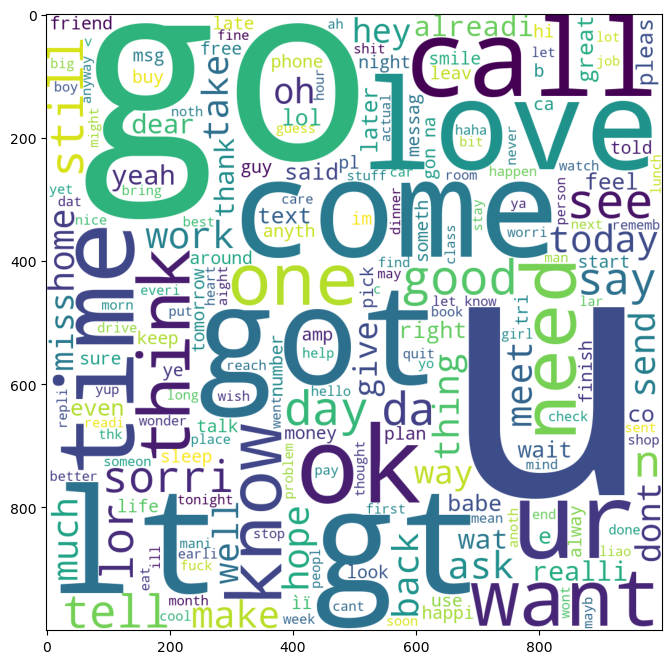

In [32]:
wc_ham = wc.generate(df[df.target == 0]['text_transformed'].str.cat(sep=' '))
plt.figure(figsize=(8,8))
plt.imshow(wc_ham)

# Modeling

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [34]:
X = cv.fit_transform(df['text_transformed']).toarray()

In [35]:
X.shape

(5169, 6708)

In [36]:
y = df['target'].values

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)

In [38]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [39]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [40]:
def test_models(models):
    
    scores = {'model': [],
             'accracy score': [],
             'precision score': []}

    _, ax = plt.subplots(1, len(models), figsize=(20,5))

    for index, model in enumerate(models):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        scores['model'].append(type(model).__name__)
        scores['accracy score'].append(accuracy)
        scores['precision score'].append(precision)

        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax[index], fmt=".0f")
        ax[index].set_title(type(model).__name__)

    scores = pd.DataFrame(scores)
    return scores

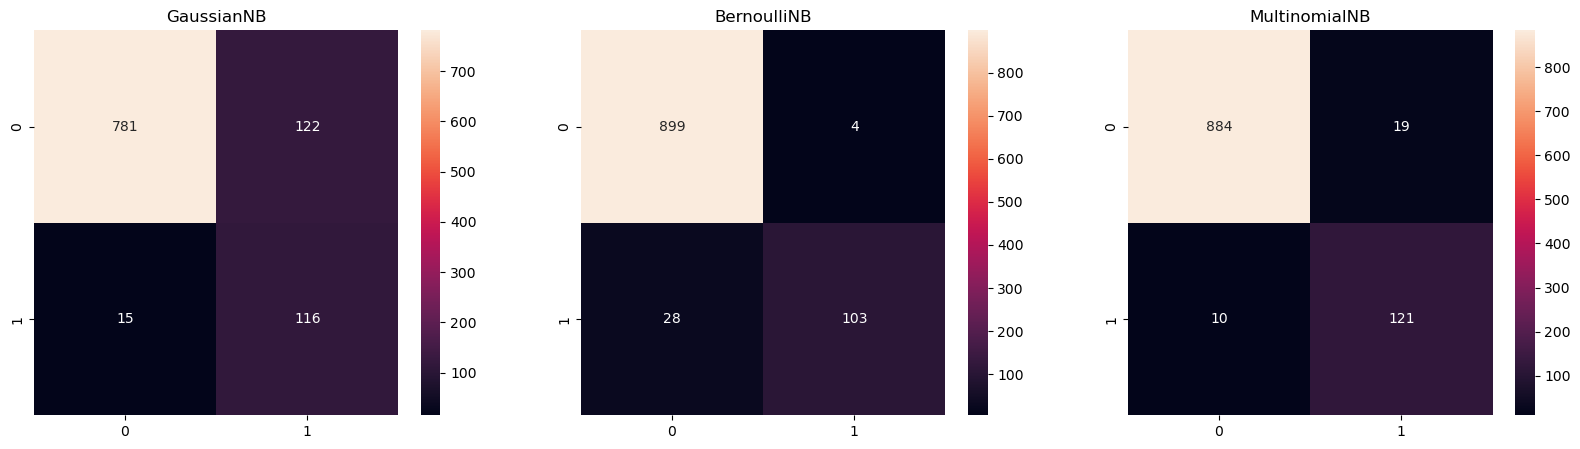

In [41]:
models = [
    GaussianNB(),
    BernoulliNB(),
    MultinomialNB(),
]
scores = test_models(models)

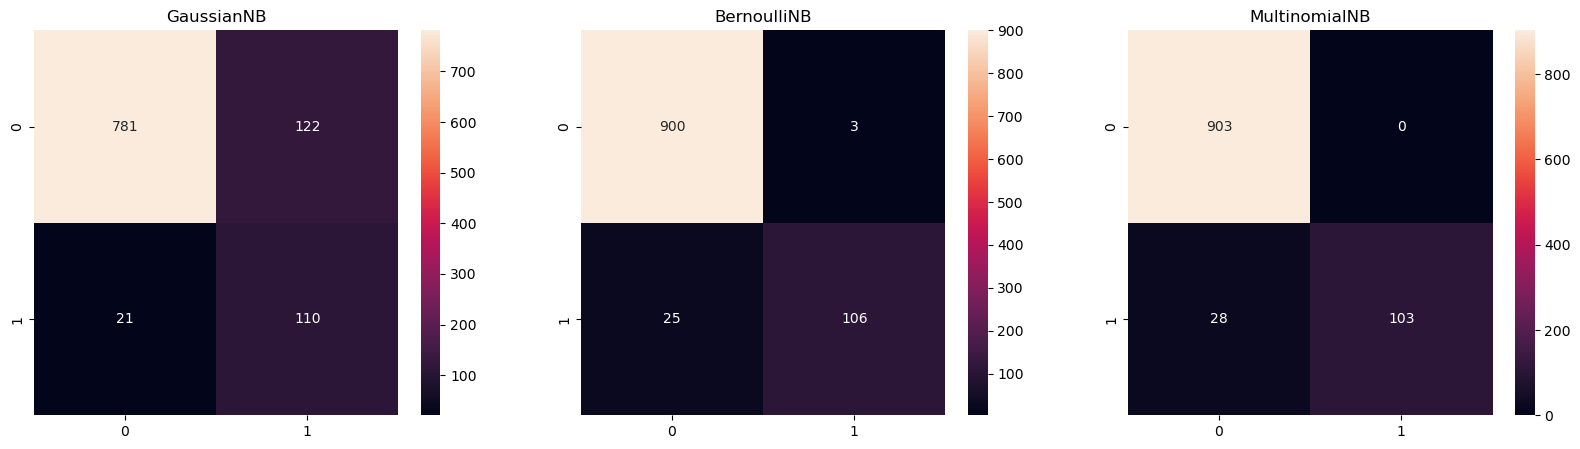

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
"""
If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus. Otherwise, all features are used.
for 4000 it's an experimental value that gaves us good results 
"""
tfidf = TfidfVectorizer(max_features=4000)
X = tfidf.fit_transform(df['text_transformed']).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

models = [
    GaussianNB(),
    BernoulliNB(),
    MultinomialNB(),
]
scores = test_models(models)

In [43]:
scores

,model,accracy score,precision score
0,GaussianNB,0.861702,0.474138
1,BernoulliNB,0.972921,0.972477
2,MultinomialNB,0.972921,1.000000


In [45]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/11/6f/419545a6a344cfd1358a80c36a06431881d607830483ef63d7c38905cd22/xgboost-2.0.1-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.7 MB 487.6 kB/s eta 0:03:25
   ---------------------------------------- 0.1/99.7 MB 744.7 kB/s eta 0:02:14
   ---------------------------------------- 0.2/99.7 MB 833.5 kB/s eta 0:02:00
   ---------------------------------------- 0.2/99.7 MB 952.6 kB/s eta 0:01:45
   ---------------------------------------- 0.2/99.7 MB 952.6 kB/s eta 0:01:45
   ---------------------------------------- 0.3/99.7 MB 999.9 kB/s eta 0:01:40
   ---------------------------------------- 0.3/99.7 MB 999.9 kB/s eta 0:01:40
   ---------------------------------------- 0.4/99.7 MB 1.1 MB/s eta 0:01:31
   ----------------------

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [47]:
models = {
    "Logistic Regression": LogisticRegression(),
    "SCV": SVC(),
    "KNN": KNeighborsClassifier(),
    "MNB": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(n_estimators=60, n_jobs=-1),
    "Extra Trees": ExtraTreesClassifier(n_estimators=60, n_jobs=-1),
}

In [48]:
def train_clf(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [49]:
import time

accuracy_scores = []
precision_scores = []

for key, model in models.items():
    start = time.time()
    accuracy, precision = train_clf(model, X_train, y_train, X_test, y_test)
    stop = time.time()
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    print(f'Model: {key}, ' +
         f'accuracy: {np.round(accuracy, 2)}, ' +
         f'precision: {np.round(precision, 2)}, ' + 
         f'training time(s): {np.round((stop - start), 2)}')

Model: Logistic Regression, accuracy: 0.96, precision: 0.98, training time(s): 0.51
Model: SCV, accuracy: 0.97, precision: 0.99, training time(s): 30.91
Model: KNN, accuracy: 0.92, precision: 1.0, training time(s): 0.78
Model: MNB, accuracy: 0.97, precision: 1.0, training time(s): 0.05
Model: Decision Tree, accuracy: 0.93, precision: 0.79, training time(s): 0.92
Model: Random Forest, accuracy: 0.97, precision: 1.0, training time(s): 3.56
Model: Extra Trees, accuracy: 0.98, precision: 0.99, training time(s): 11.86


In [50]:
benchmark_df = pd.DataFrame({'Classifier': models.keys(),
                            'Accuracy': accuracy_scores,
                            'Precision': precision_scores})

In [51]:
benchmark_df.sort_values(by='Precision', ascending=False)

,Classifier,Accuracy,Precision
2,KNN,0.918762,1.000000
3,MNB,0.972921,1.000000
5,Random Forest,0.970019,1.000000
6,Extra Trees,0.978723,0.990991
1,SCV,0.972921,0.990476
0,Logistic Regression,0.955513,0.977528
4,Decision Tree,0.927466,0.785714


In [52]:
best_models = {
    "Random Forest": RandomForestClassifier(n_jobs=-1),
    "MNB": MultinomialNB(),
    "KNN": KNeighborsClassifier(n_jobs=-1),
}
grid = {
    "Random Forest": {
                    "n_estimators": [50, 100, 150, 200],
                    "max_depth": [None, 5, 10, 20, 30],
                    "min_samples_split": [2, 5, 10]
                    },
    "MNB": {
        "alpha": [0.1, 0.5, 1.0]
          },
    "KNN": {
        "n_neighbors": [3, 5, 7],
        "weights": ["uniform", "distance"]
            }
}

In [53]:
X_train_, X_valid, y_train_, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=100, stratify=y_train)
y_train_ = y_train_.astype(int)
y_valid = y_valid.astype(int)

In [69]:
from sklearn.model_selection import GridSearchCV

model_best_params = best_models.copy()

for key, model in best_models.items():
    start = time.time()
    
    grid_search = GridSearchCV(estimator=model, param_grid=grid[key], cv=None, n_jobs=-1, scoring='f1')
    grid_search.fit(X_train_, y_train_)
    
    stop = time.time()
    training_time = np.round((stop-start), 2)
    model_best_params[key] = grid_search.best_params_
    
    print(f'Model: {key}, '+
          f'score: {grid_search.score(X_valid, y_valid)}'
          f'training time(s): {training_time}')

Model: Random Forest, score: 0.8369565217391305training time(s): 440.67
Model: MNB, score: 0.8877551020408162training time(s): 1.39
Model: KNN, score: 0.5655172413793104training time(s): 7.06


In [67]:
model_best_params

{'Random Forest': {'max_depth': None,
  'min_samples_split': 10,
  'n_estimators': 100},
 'MNB': {'alpha': 0.1},
 'KNN': {'n_neighbors': 3, 'weights': 'distance'}}

In [71]:
best_models = {
    "Random Forest": RandomForestClassifier(**model_best_params['Random Forest'], n_jobs=-1),
    "MNB": MultinomialNB(**model_best_params['MNB']),
    "KNN": KNeighborsClassifier(**model_best_params['KNN'], n_jobs=-1),
}

In [72]:
accuracy_scores = []
precision_scores = []

for key, model in best_models.items():
    
    accuracy, precision = train_clf(model, X_train, y_train, X_test, y_test)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    print(f'Model: {key}, ' +
         f'accuracy: {np.round(accuracy, 2)}, ' +
         f'precision: {np.round(precision, 2)}, ')
    
temp_df = pd.DataFrame({'Classifier': best_models.keys(),
                            'Accuracy': accuracy_scores,
                            'Precision': precision_scores})

Model: Random Forest, accuracy: 0.98, precision: 1.0, 
Model: MNB, accuracy: 0.98, precision: 0.96, 
Model: KNN, accuracy: 0.94, precision: 1.0, 


In [68]:
temp_df

,Classifier,Accuracy,Precision
0,Random Forest,0.974855,1.000000
1,MNB,0.983559,0.959677
2,KNN,0.940039,1.000000


In [70]:
benchmark_df

,Classifier,Accuracy,Precision
0,Logistic Regression,0.955513,0.977528
1,SCV,0.972921,0.990476
2,KNN,0.918762,1.000000
3,MNB,0.972921,1.000000
4,Decision Tree,0.927466,0.785714
5,Random Forest,0.970019,1.000000
6,Extra Trees,0.978723,0.990991


In [73]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[
    ('RF', RandomForestClassifier(**model_best_params['Random Forest'])),
    ('MNB', MultinomialNB()),
    ('KNN', KNeighborsClassifier(**model_best_params['KNN']))
], voting='soft', n_jobs=-1)

In [74]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('RF',
                              RandomForestClassifier(min_samples_split=10)),
                             ('MNB', MultinomialNB()),
                             ('KNN',
                              KNeighborsClassifier(n_neighbors=3,
                                                   weights='distance'))],
                 n_jobs=-1, voting='soft')

In [75]:
y_pred = voting.predict(X_test)
print(f'accuracy: {accuracy_score(y_test, y_pred)}')
print(f'precision: {precision_score(y_test, y_pred)}')

accuracy: 0.971953578336557
precision: 1.0
